<a href="https://colab.research.google.com/github/pakpahansalma/python_for_datascience/blob/main/TUGAS_5_DS_CAKAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Penerapan Functional Programming

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/SI DATA SCIENTIST CAKAP/adidas.csv')
print(df.head())

                                                 url  \
0  https://www.adidas.com/us/beach-shorts/FJ5089....   
1  https://www.adidas.com/us/five-ten-kestrel-lac...   
2  https://www.adidas.com/us/mexico-away-jersey/G...   
3  https://www.adidas.com/us/five-ten-hiangle-pro...   
4  https://www.adidas.com/us/mesh-broken-stripe-p...   

                                              name     sku  selling_price  \
0                                     Beach Shorts  FJ5089             40   
1        Five Ten Kestrel Lace Mountain Bike Shoes  BC0770            150   
2                               Mexico Away Jersey  GC7946             70   
3  Five Ten Hiangle Pro Competition Climbing Shoes  FV4744            160   
4                    Mesh Broken-Stripe Polo Shirt  GM0239             65   

  original_price currency availability  color  category                source  \
0            NaN      USD      InStock  Black  Clothing  adidas United States   
1            NaN      USD      InStock

In [ ]:
#Lambda function
#Menggunakan lambda untuk memfilter produk dengan harga jual di bawah $100
produk_murah = df[df['selling_price'].apply(lambda x: x < 100)]

print(produk_murah[['name', 'selling_price']])

                              name  selling_price
0                     Beach Shorts             40
2               Mexico Away Jersey             70
4    Mesh Broken-Stripe Polo Shirt             65
6           Adicross Hybrid Shorts             80
7              Tiro 21 Windbreaker             60
..                             ...            ...
840               Supernova+ Shoes             72
841                   Choigo Shoes             70
842                Daily 3.0 Shoes             35
843                Daily 3.0 Shoes             40
844                   Choigo Shoes             70

[780 rows x 2 columns]


In [ ]:
#Rekursion: untuk menghitung total harga jual
def recursive_sum(prices):
    #jika daftar kosong, kembalikan 0
    if not prices:
        return 0
    #mengambil harga pertama dan menjumlahkannya dengan hasil rekursif dari sisa daftar
    return prices[0] + recursive_sum(prices[1:])

#Mengambil daftar harga jual dan menghapus nilai NaN
selling_prices = df['selling_price'].dropna().tolist()
#Menghitung total harga menggunakan rekursi
total_price = recursive_sum(selling_prices)
#Menampilkan hasil
print(f"Total harga jual dari semua produk: {total_price}")

Total harga jual dari semua produk: 44948


In [ ]:
#Fungsi First Class
#Fungsi untuk mendapatkan produk yang tersedia
def produk_tersedia(df):
    return df[df['availability'] == 'InStock']

#Fungsi untuk mendapatkan harga produk berdasarkan SKU
def harga_produk(df, sku):
    produk = df[df['sku'] == sku]
    return produk['selling_price'].values[0] if not produk.empty else None

#Penggunaan
produk = produk_tersedia(df)
print("Produk yang Tersedia:")
print(produk[['name', 'selling_price']])

sku = 'FJ5089'
harga = harga_produk(df, sku)
print(f"\nHarga produk dengan SKU {sku}: {harga}")

Produk yang Tersedia:
                                                name  selling_price
0                                       Beach Shorts             40
1          Five Ten Kestrel Lace Mountain Bike Shoes            150
2                                 Mexico Away Jersey             70
3    Five Ten Hiangle Pro Competition Climbing Shoes            160
4                      Mesh Broken-Stripe Polo Shirt             65
..                                               ...            ...
840                                 Supernova+ Shoes             72
841                                     Choigo Shoes             70
842                                  Daily 3.0 Shoes             35
843                                  Daily 3.0 Shoes             40
844                                     Choigo Shoes             70

[842 rows x 2 columns]

Harga produk dengan SKU FJ5089: 40


NUMPY

In [ ]:
#Numpy Statistic
import numpy as np

# Mean dan standard deviation pada selling prices
mean_price = np.mean(df['selling_price'].dropna())
std_price = np.std(df['selling_price'].dropna())

#Mencetak hasil
print("\nStatistik harga jual:")
print(f"Mean: {mean_price}")
print(f"Standard Deviation: {std_price}")


Statistik harga jual:
Mean: 53.19289940828402
Standard Deviation: 31.393052361372025


In [ ]:
# Joining category dan color
df['full_category'] = df['category'] + ' - ' + df['color']

# Mencetak hasil
print("Kolom full_category setelah penggabungan:")
print(df[['category', 'color', 'full_category']].head())

Kolom full_category setelah penggabungan:
   category  color     full_category
0  Clothing  Black  Clothing - Black
1     Shoes   Grey      Shoes - Grey
2  Clothing  White  Clothing - White
3     Shoes  Black     Shoes - Black
4  Clothing   Blue   Clothing - Blue


In [ ]:
#Split
#Splitting full_category ke dalam category_split dan color_split
df[['category_split', 'color_split']] = df['full_category'].str.split(' - ', expand=True)

# Mencetak hasil
print("\nHasil pemisahan full_category:")
print(df[['full_category', 'category_split', 'color_split']].head())


Hasil pemisahan full_category:
      full_category category_split color_split
0  Clothing - Black       Clothing       Black
1      Shoes - Grey          Shoes        Grey
2  Clothing - White       Clothing       White
3     Shoes - Black          Shoes       Black
4   Clothing - Blue       Clothing        Blue


In [ ]:
#Matriks

# Mengganti nilai NaN dengan 0 untuk operasi matriks
df['selling_price'].fillna(0, inplace=True)
df['original_price'].fillna(0, inplace=True)

# Membuat matriks dari kolom selling_price dan original_price
price_matrix = np.array(df[['selling_price', 'original_price']])

# Mencetak matriks
print("Matriks harga:")
print(price_matrix)


Matriks harga:
[[40 0]
 [150 0]
 [70 0]
 ...
 [35 '$50']
 [40 '$50']
 [70 '$100']]


PANDAS

In [ ]:
#Filter: Menampilkan produk yang tersedia dalam stok
in_stock = df[df['availability'] == 'InStock']

print("Produk yang tersedia dalam stok:")
print(in_stock[['name', 'selling_price']].head())


Produk yang tersedia dalam stok:
                                              name  selling_price
0                                     Beach Shorts             40
1        Five Ten Kestrel Lace Mountain Bike Shoes            150
2                               Mexico Away Jersey             70
3  Five Ten Hiangle Pro Competition Climbing Shoes            160
4                    Mesh Broken-Stripe Polo Shirt             65


In [ ]:
#Replace: Menggantikan nilai NaN pada kolom selling_price dengan median
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

print("\nHarga jual setelah penggantian nilai yang hilang:")
print(df[['name', 'selling_price']].head())


Harga jual setelah penggantian nilai yang hilang:
                                              name  selling_price
0                                     Beach Shorts             40
1        Five Ten Kestrel Lace Mountain Bike Shoes            150
2                               Mexico Away Jersey             70
3  Five Ten Hiangle Pro Competition Climbing Shoes            160
4                    Mesh Broken-Stripe Polo Shirt             65


In [ ]:
#Group: Mengelompokkan berdasarkan kategori dan menghitung rata-rata harga jual
grouped_avg_price = df.groupby('category')['selling_price'].mean().reset_index()

# Mencetak rata-rata harga jual berdasarkan kategori
print("\nRata-rata harga jual berdasarkan kategori:")
print(grouped_avg_price)


Rata-rata harga jual berdasarkan kategori:
      category  selling_price
0  Accessories      26.195122
1     Clothing      39.332344
2        Shoes      69.354460


VISUALISASI

In [ ]:
pip install pandas matplotlib seaborn

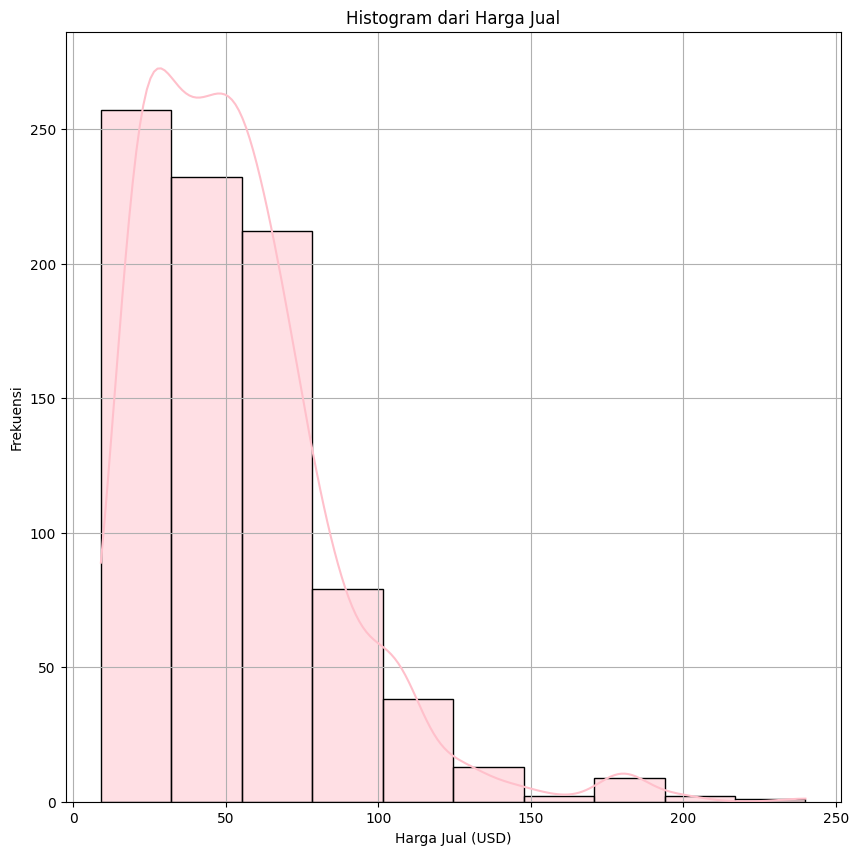

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram dari harga jual
plt.figure(figsize=(10, 10))
sns.histplot(df['selling_price'], bins=10, kde=True, color='pink')
plt.title('Histogram dari Harga Jual')
plt.xlabel('Harga Jual (USD)')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()

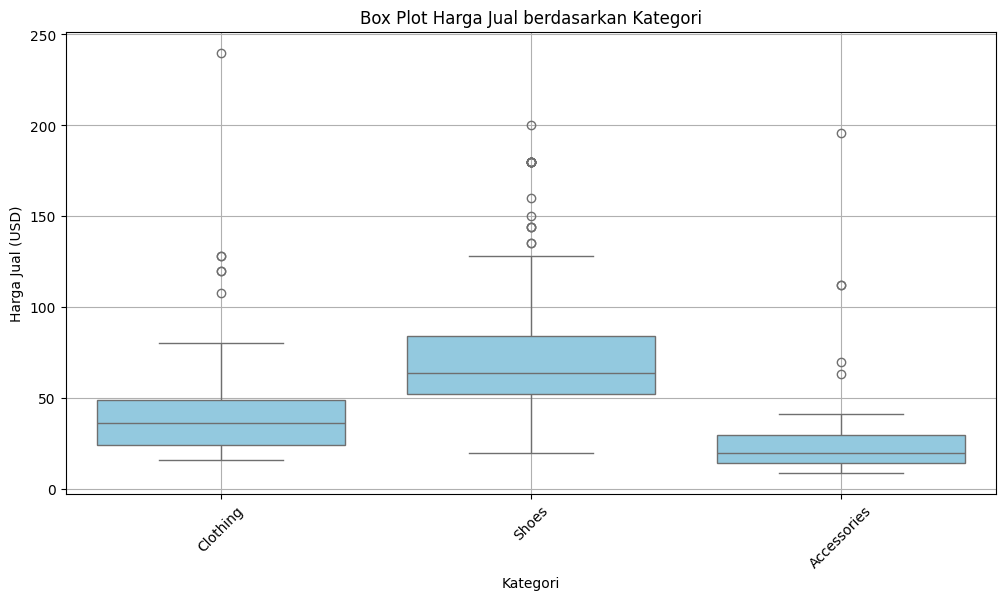

In [ ]:
# Box plot untuk melihat distribusi harga berdasarkan kategori
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='selling_price', data=df, color = 'skyblue'),
plt.title('Box Plot Harga Jual berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Harga Jual (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

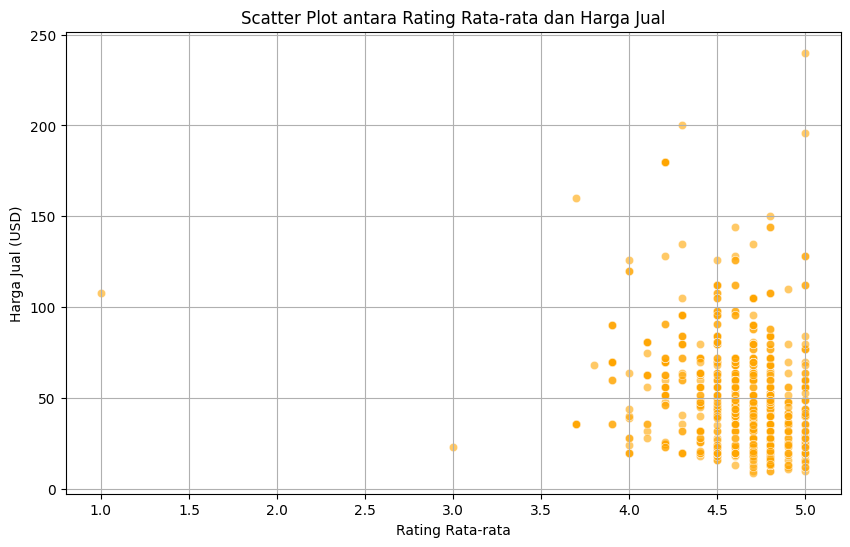

In [ ]:
# Scatter plot untuk melihat hubungan antara rating rata-rata dan harga dengan warna yang diubah
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_rating', y='selling_price', data=df, color='orange', alpha=0.6)
plt.title('Scatter Plot antara Rating Rata-rata dan Harga Jual')
plt.xlabel('Rating Rata-rata')
plt.ylabel('Harga Jual (USD)')
plt.grid()
plt.show()